In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Obtener un df donde cada columna corresponda a un estado, el índice sea temporal para cada mes de cada año y la información muestre la lluvia acumulada en todas las estaciones

In [24]:
path = "https://smn.conagua.gob.mx/tools/RESOURCES/com_archivo_datos_resumenes/201804010000Lluv.csv"
def read_lluvia(path):    
    df = pd.read_csv(path, encoding="latin-1", usecols=[2,5])
    df = df.groupby(by="EDO").sum()
    df = df.T
    year = path[-20:-16]
    month = path[-16:-14]
    df["time"] =  pd.to_datetime(year+month, format="%Y%m")
    return df

In [31]:
data = []
fail = []
for year in range(2013,2025,1):
    for month in range(1,13,1):
        path = f"https://smn.conagua.gob.mx/tools/RESOURCES/com_archivo_datos_resumenes/{year}{month:02d}010000Lluv.csv"
        try:
            data.append(read_lluvia(path))
        except:
            fail.append(path)    

In [33]:
len(fail)

28

In [34]:
len(data)

116

In [37]:
data = pd.concat(data)

In [42]:
data.set_index("time", inplace=True)

In [49]:
data.fillna(0, inplace=True)
# data

In [45]:
data.columns

Index(['AGS', 'CAMP', 'CDMX', 'CHIH', 'CHIS', 'COAH', 'COL', 'DGO', 'GRO',
       'GTO', 'HGO', 'JAL', 'MEX', 'MICH', 'MOR', 'NL', 'OAX', 'PUE', 'QRO',
       'QROO', 'SIN', 'SLP', 'TAB', 'TAMP', 'TLAX', 'VER', 'YUC', 'ZAC', 'BC',
       'BCS', 'NAY', 'SON', 'DF', 'TAMS', 'TAMPS', 'HDO'],
      dtype='object', name='EDO')

In [47]:
data["CDMX"] = data.CDMX + data.DF
data["TAM"] = data.TAMP + data.TAMPS + df.TAMS
data["HGO"] = data.HDO + data.HGO
data.drop(["DF","TAMPS","TAMS","TAMP","HDO"], axis=1, inplace=True)

In [48]:
data

EDO,AGS,CAMP,CDMX,CHIH,CHIS,COAH,COL,DGO,GRO,GTO,...,TAB,TLAX,VER,YUC,ZAC,BC,BCS,NAY,SON,TAM
time,,,,,,,,,,,,,,,,,,,,,
2014-11-01,269.10,459.90,457.70,14.30,4861.70,856.60,1462.20,237.80,462.80,220.90,...,4559.90,58.9,7178.30,858.90,751.50,0.00,0.00,0.00,0.00,NaN
2014-12-01,84.70,433.10,1072.80,14.50,861.10,149.40,148.60,28.30,153.20,94.70,...,588.70,186.8,3979.30,375.40,456.30,0.00,0.00,0.00,0.00,NaN
2015-01-01,138.20,1047.10,12.90,932.30,4671.20,380.80,0.00,900.90,8.30,156.60,...,5100.00,65.5,7301.70,881.00,522.20,12.60,52.80,11.50,1345.20,NaN
2015-02-01,763.50,333.30,101.70,1163.60,1932.80,572.70,1190.50,1434.80,51.00,470.80,...,1434.20,21.2,1964.40,800.30,2332.70,13.50,36.70,1190.40,955.30,NaN
2015-03-01,2234.50,1336.00,1012.50,1621.10,3335.50,1437.30,2799.80,2261.10,1043.10,4766.50,...,2429.70,672.5,9752.40,759.20,3728.30,34.80,148.60,715.70,1526.10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-01,56.29,220.45,3011.29,0.01,6251.83,515.99,0.00,113.03,409.02,455.82,...,1193.60,602.1,534.77,25.30,96.67,24.77,0.10,0.00,0.00,NaN
2024-06-01,1543.96,7219.49,9943.59,815.02,40684.59,1430.79,1009.30,1320.12,5672.21,5923.27,...,6847.95,1257.0,41086.63,8241.19,2932.23,1.30,100.49,2003.97,1033.69,NaN
2024-07-01,2360.11,2154.41,12612.26,2140.72,25003.62,1209.81,4084.11,4765.49,9916.92,9098.56,...,2928.70,1386.1,27067.83,2840.23,5125.73,22.13,38.48,2563.89,3634.48,NaN


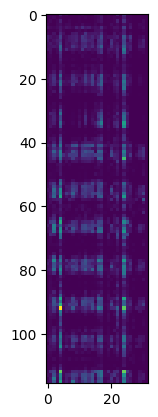

In [51]:
plt.imshow(data)

In [59]:
data

EDO,AGS,CAMP,CDMX,CHIH,CHIS,COAH,COL,DGO,GRO,GTO,...,TAB,TLAX,VER,YUC,ZAC,BC,BCS,NAY,SON,TAM
time,,,,,,,,,,,,,,,,,,,,,
2014-11-01,269.10,459.90,457.70,14.30,4861.70,856.60,1462.20,237.80,462.80,220.90,...,4559.90,58.9,7178.30,858.90,751.50,0.00,0.00,0.00,0.00,0.0
2014-12-01,84.70,433.10,1072.80,14.50,861.10,149.40,148.60,28.30,153.20,94.70,...,588.70,186.8,3979.30,375.40,456.30,0.00,0.00,0.00,0.00,0.0
2015-01-01,138.20,1047.10,12.90,932.30,4671.20,380.80,0.00,900.90,8.30,156.60,...,5100.00,65.5,7301.70,881.00,522.20,12.60,52.80,11.50,1345.20,0.0
2015-02-01,763.50,333.30,101.70,1163.60,1932.80,572.70,1190.50,1434.80,51.00,470.80,...,1434.20,21.2,1964.40,800.30,2332.70,13.50,36.70,1190.40,955.30,0.0
2015-03-01,2234.50,1336.00,1012.50,1621.10,3335.50,1437.30,2799.80,2261.10,1043.10,4766.50,...,2429.70,672.5,9752.40,759.20,3728.30,34.80,148.60,715.70,1526.10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-01,56.29,220.45,3011.29,0.01,6251.83,515.99,0.00,113.03,409.02,455.82,...,1193.60,602.1,534.77,25.30,96.67,24.77,0.10,0.00,0.00,0.0
2024-06-01,1543.96,7219.49,9943.59,815.02,40684.59,1430.79,1009.30,1320.12,5672.21,5923.27,...,6847.95,1257.0,41086.63,8241.19,2932.23,1.30,100.49,2003.97,1033.69,0.0
2024-07-01,2360.11,2154.41,12612.26,2140.72,25003.62,1209.81,4084.11,4765.49,9916.92,9098.56,...,2928.70,1386.1,27067.83,2840.23,5125.73,22.13,38.48,2563.89,3634.48,0.0


<Axes: xlabel='EDO', ylabel='time'>

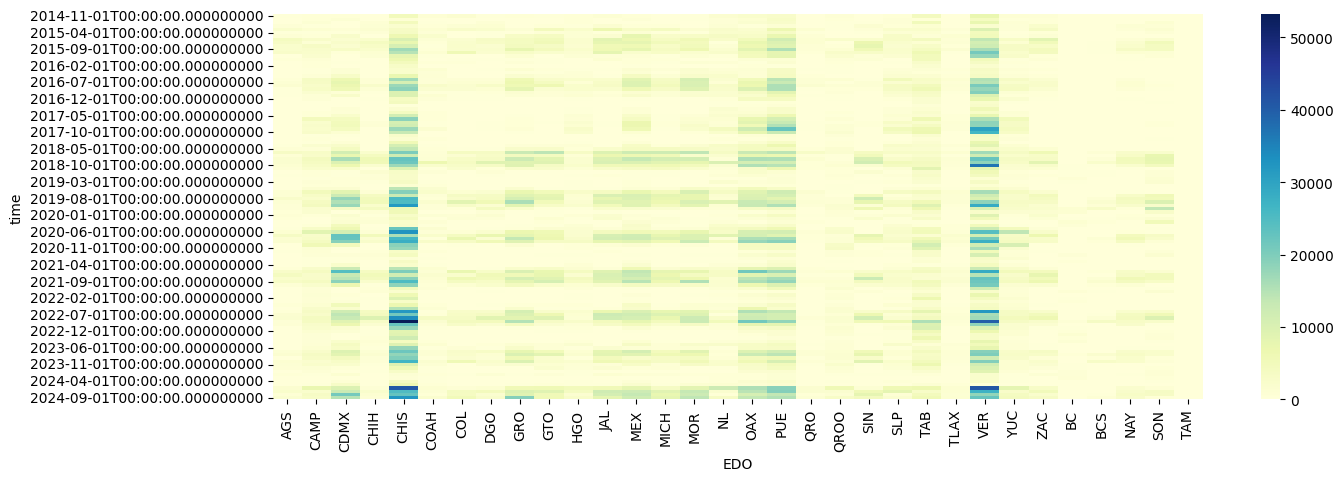

In [60]:
plt.figure(figsize=(15,5))
sns.heatmap(data, cmap="YlGnBu")

In [55]:
data_month = data.groupby(data.index.month).mean()
data_month

EDO,AGS,CAMP,CDMX,CHIH,CHIS,COAH,COL,DGO,GRO,GTO,...,TAB,TLAX,VER,YUC,ZAC,BC,BCS,NAY,SON,TAM
time,,,,,,,,,,,,,,,,,,,,,
1,163.545556,659.835556,435.267778,429.430000,4639.373333,313.108889,176.833333,330.956667,128.372222,130.736667,...,2871.930000,75.063333,6310.201111,821.932222,384.248889,355.308889,83.008889,69.797778,708.796667,0.0
2,214.751111,375.403333,378.320000,482.497778,4000.971111,203.641111,298.356444,392.417778,64.922222,297.480444,...,2658.798889,34.170000,2914.585111,684.098889,536.702222,342.306667,48.147111,236.970444,667.574444,0.0
3,240.357000,494.949000,953.180000,450.426000,2985.346000,513.105000,298.150000,281.273000,262.150000,632.493000,...,1554.869000,172.379000,4462.747000,482.662000,440.830000,482.589000,79.692400,88.317000,964.148000,0.0
4,134.501111,630.411111,2057.627778,148.608889,4222.201111,502.028889,0.733333,109.260000,221.655556,297.970000,...,1036.738889,344.938889,4039.894444,743.980000,141.128889,100.933333,1.824444,0.524444,117.368889,0.0
5,309.761000,1343.592000,4177.952000,152.235000,12079.499000,1164.463000,53.262000,226.627000,1669.564000,1436.713000,...,2029.010000,649.721000,5805.018000,1608.572000,520.142000,27.375000,2.940000,27.979000,55.116000,0.0
6,1545.162000,4376.165100,9251.281000,1618.916000,22855.841000,951.967100,2069.310000,1906.296000,6737.383000,5011.675000,...,4844.203000,1030.523000,21117.981000,5118.197000,3125.367000,1.314000,188.615000,1284.252000,1055.760200,0.0
7,1986.908000,2572.801400,10685.797900,3191.694000,14949.242000,1018.052000,2524.460200,3624.851100,6578.958000,5698.230600,...,2514.311000,1057.742000,15704.426400,2685.363000,4387.410000,35.410000,134.409200,2665.664800,3875.811000,0.0
8,1684.829000,3261.433600,12722.571100,3576.974000,20759.958200,1231.465000,3345.584400,3109.236500,8605.389000,6608.341000,...,3694.907000,1087.777000,18205.655100,3535.494000,3320.193000,98.407000,768.968200,3554.077000,4108.565000,0.0
9,1333.626000,3380.833000,10452.165998,2380.352000,25831.047996,2044.726100,3536.993000,3590.198001,9925.608001,4690.816000,...,6476.000999,1097.411000,22542.357999,3725.023000,3451.403000,94.584000,1183.956000,2966.575001,2952.318000,0.0


<Axes: xlabel='EDO', ylabel='time'>

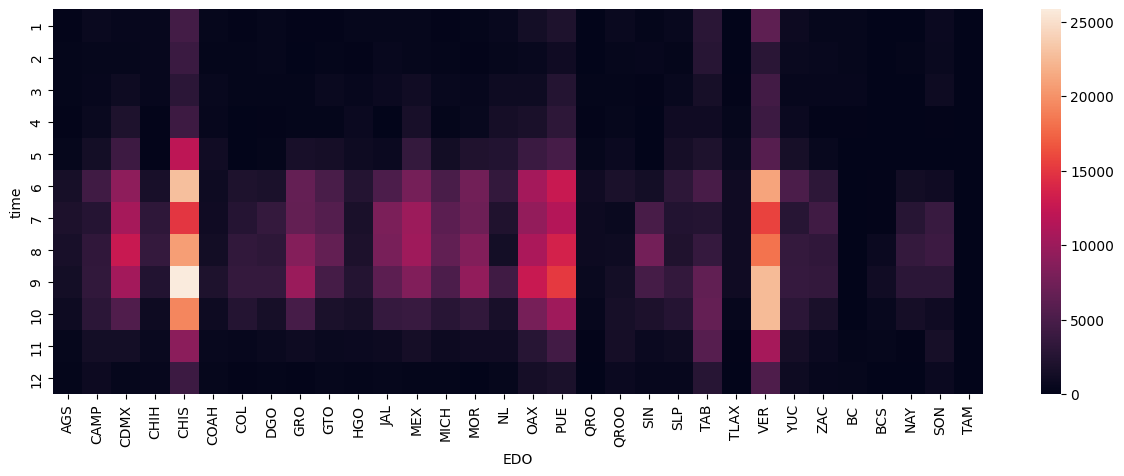

In [58]:
plt.figure(figsize=(15,5))
sns.heatmap(data_month)